## Models of Stock Return

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
# Leer el archivo CSV y establecer la primera columna como índice
data = pd.read_csv('C:/Users/Usuario/Desktop/proyectos/Analisis_Financiero_1/Datasets/portfolio_data.csv', index_col=0, parse_dates=True)
print(data.head())

                  AMZN        DPZ         BTC       NFLX
Date                                                    
2013-05-01  248.229996  51.190983  106.250000  30.415714
2013-05-02  252.550003  51.987320   98.099998  30.641428
2013-05-03  258.049988  52.446388  112.900002  30.492857
2013-05-06  255.720001  53.205257  109.599998  30.098572
2013-05-07  257.730011  54.151505  113.199997  29.464285


## Distribution of Log return

In [3]:
# let play around with ms data by calculating the log daily return
data['LogReturn'] = np.log(data['AMZN']).shift(-1) - np.log(data['AMZN'])

#np.log logaritmo natural (base e) de los valores de la serie de precios de las acciones.

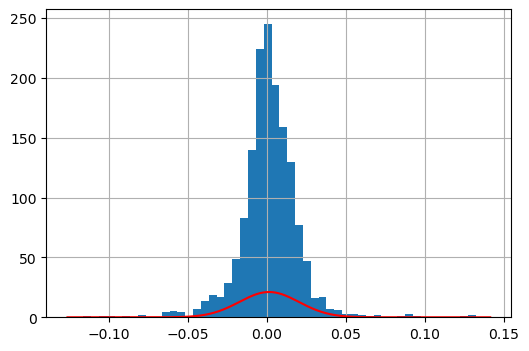

In [4]:
# Plot a histogram to show the distribution of log return of AMZN's stock. 
# You can see it is very close to a normal distribution
from scipy.stats import norm
mu = data['LogReturn'].mean()
sigma =data['LogReturn'].std(ddof=1)  # indica que se está calculando la desviación estándar muestral (que utiliza n-1 como denominador)

density = pd.DataFrame()
density['x'] = np.arange(data['LogReturn'].min()-0.01, data['LogReturn'].max()+0.01, 0.001)   # np.arange(start, stop, step)
density['pdf'] = norm.pdf(density['x'], mu, sigma)  # función de densidad de probabilidad (PDF) de una distribución normal (también conocida como distribución gaussiana

data['LogReturn'].hist(bins=50, figsize=(6, 4))   # bins : intervalos en los que se divide el rango de datos para contar las frecuencias de los valores.
plt.plot(density['x'], density['pdf'], color='red')   # eje horizontal, eje vertical , color
plt.show()

## Calculate the probability of the stock price will drop over a certain percentage in a day

In [5]:
# probability that the stock price AMZN will drop over 5% in a day   drop over = caiga por encima

prob_return1 = norm.cdf(-0.05, mu, sigma)  
# norm.cdf es la función de distribución acumulativa (CDF) de la distribución normal, que nos da la probabilidad acumulada hasta un cierto valor x

print('The Probability is ', prob_return1, "Significa que hay un", prob_return1*100 , " % de probabilidad de que el precio de la acción caiga más de un 5% en un solo día.")

The Probability is  0.0033052653239837027 Significa que hay un 0.33052653239837027  % de probabilidad de que el precio de la acción caiga más de un 5% en un solo día.


In [6]:
# Now is your turn, calculate the probability that the stock price of AMZN will drop over 10% in a day
prob_return1 = norm.cdf(-0.1, mu, sigma)
print('The Probability is ', prob_return1)

The Probability is  4.1172375834577225e-08


## Calculate the probability of the stock price will drop over a certain percentage in a year

In [7]:
# drop over 40% in 220 days

mu220 = 220*mu                                 # Como los rendimientos se suman : 220*mu
sigma220 = (220**0.5) * sigma                  # Las desviaciones estándar no se suman linealmente
Distri_Acu = norm.cdf(-0.4, mu220, sigma220)   #función de distribución acumulativa (CDF) de la distribución normal

print('The probability of dropping over 40% in 220 days is ', Distri_Acu )

The probability of dropping over 40% in 220 days is  0.006901386639353352


In [8]:
# drop over 20% in 220 days
mu220 = 220*mu                    
sigma220 = (220**0.5) * sigma       
drop20 = norm.cdf(-0.2, mu220, sigma220)
print('The probability of dropping over 20% in 220 days is ', drop20)

The probability of dropping over 20% in 220 days is  0.04016573975174348


## Calculate Value at risk (VaR)

In [9]:
# Value at risk(VaR)

VaR = norm.ppf(0.05, mu, sigma)

print('Single day value at risk ', VaR)

Single day value at risk  -0.02976238890023386


**norm.ppf: Es la función percent point function (PPF), también conocida como la función inversa de la distribución acumulativa (CDF).**

Esta función toma un percentil como entrada (en este caso, 0.05) y devuelve el valor de la variable aleatoria (en este caso, el rendimiento) 
que corresponde a ese percentil bajo una distribución normal con media (mu) y desviación estándar (sigma).

En este contexto 0.05 representa el percentil de 5%. Es decir, estamos calculando el valor de la variable (rendimiento) que deja el 5% de los resultados por debajo de él. Este valor corresponde al VaR, que es el límite inferior del 5% de los posibles rendimientos diarios.

*Es decir, el VaR indica el pérdida máxima esperada con una probabilidad del 5% en un solo día.*


In [10]:
# Value at risk(VaR)

VaR = norm.ppf(0.95, mu, sigma)


Si el VaR del 95% de un portafolio es 10.000. Esto significa que en el 95 % de los casos, la pérdida no será mayor a 10.000 en el periodo considerado. En el 5% de los casos restantes, las pérdidas podrían ser mayores a $10,000.

In [11]:
# Quatile 
# 5% quantile
print('5% quantile ', norm.ppf(0.05, mu, sigma))

# 95% quantile
print('95% quantile ', norm.ppf(0.95, mu, sigma))

5% quantile  -0.02976238890023386
95% quantile  0.03239995353951291


In [12]:
# This is your turn to calcuate the 25% and 75% Quantile of the return

# 25% quantile
q25 = norm.ppf(0.25, mu, sigma)
print('25% quantile ', q25)

# 75% quantile
q75 = norm.ppf(0.75, mu, sigma)
print('75% quantile ', q75)

25% quantile  -0.011426383005951191
75% quantile  0.014063947645230253


🔴 5% cuantil (percentil 5%)
Esto significa que el 5% de los días la empresa tuvo ganancias muy bajas o incluso pérdidas. Por ejemplo, si el cuantil del 5% es -500 dólares, significa que en el 5% de los peores días, la empresa perdió al menos 500 dólares. Es decir, en esos días malos, las pérdidas fueron de -500 dólares o incluso peores.

🟢 95% cuantil (percentil 95%)
Este nos dice que en el 95% de los días la empresa ganó menos que este valor. Si el cuantil del 95% es 1,500 dólares, significa que en el 95% de los días la empresa tuvo ganancias de 1,500 dólares o menos. Solo en el 5% de los días más exitosos, la empresa ganó más de 1,500 dólares.